#  Global Mobile Reviews Dataset (2025 Edition)

---

This dataset presents a curated collection of over 50,000 mobile phone reviews gathered through web scraping, market analysis, and content aggregation from multiple e-commerce and tech review platforms.
It covers eight countries and includes detailed user opinions, ratings, sentiment polarity, and pricing data across leading smartphone brands.

Each record captures customer experience holistically — spanning demographics, verified purchase details, multi-aspect ratings, and currency-adjusted pricing

---

In [5]:
# Importing Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Getting our data
mobile_reviews=pd.read_csv('Mobile Reviews Sentiment.csv')
mobile_reviews.head(5)

,review_id,customer_name,age,brand,model,price_usd,price_local,currency,exchange_rate_to_usd,rating,...,verified_purchase,battery_life_rating,camera_rating,performance_rating,design_rating,display_rating,review_length,word_count,helpful_votes,source
0,1,Aryan Maharaj,45,Realme,Realme 12 Pro,337.31,₹27996.73,INR,83.00,2,...,True,1,1,3,2,1,46,7,1,Amazon
1,2,Davi Miguel Sousa,18,Realme,Realme 12 Pro,307.78,R$1754.35,BRL,5.70,4,...,True,3,2,4,3,2,74,12,5,Flipkart
2,3,Pahal Balay,27,Google,Pixel 6,864.53,₹71755.99,INR,83.00,4,...,True,3,5,3,2,4,55,11,8,AliExpress
3,4,David Guzman,19,Xiaomi,Redmi Note 13,660.94,د.إ2425.65,AED,3.67,3,...,False,1,3,2,1,2,66,11,3,Amazon
4,5,Yago Leão,38,Motorola,Edge 50,792.13,R$4515.14,BRL,5.70,3,...,True,3,3,2,2,1,73,12,0,BestBuy


In [7]:
mobile_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   review_id             50000 non-null  int64  
 1   customer_name         50000 non-null  object 
 2   age                   50000 non-null  int64  
 3   brand                 50000 non-null  object 
 4   model                 50000 non-null  object 
 5   price_usd             50000 non-null  float64
 6   price_local           50000 non-null  object 
 7   currency              50000 non-null  object 
 8   exchange_rate_to_usd  50000 non-null  float64
 9   rating                50000 non-null  int64  
 10  review_text           50000 non-null  object 
 11  sentiment             50000 non-null  object 
 12  country               50000 non-null  object 
 13  language              50000 non-null  object 
 14  review_date           50000 non-null  object 
 15  verified_purchase  

In [8]:
# Dropping Columns that are not necessary for our analysis 
mobile_reviews.drop(columns=['customer_name','price_local','currency','exchange_rate_to_usd','review_text','language','review_length',
                             'word_count','helpful_votes'],inplace=True)

### 1. Data Overview

After this we can proceed to check an overview of the data 

In [11]:
mobile_reviews.head()

,review_id,age,brand,model,price_usd,rating,sentiment,country,review_date,verified_purchase,battery_life_rating,camera_rating,performance_rating,design_rating,display_rating,source
0,1,45,Realme,Realme 12 Pro,337.31,2,Negative,India,2023-11-06,True,1,1,3,2,1,Amazon
1,2,18,Realme,Realme 12 Pro,307.78,4,Positive,Brazil,2023-03-30,True,3,2,4,3,2,Flipkart
2,3,27,Google,Pixel 6,864.53,4,Positive,India,2022-12-07,True,3,5,3,2,4,AliExpress
3,4,19,Xiaomi,Redmi Note 13,660.94,3,Positive,UAE,2025-03-11,False,1,3,2,1,2,Amazon
4,5,38,Motorola,Edge 50,792.13,3,Neutral,Brazil,2023-09-29,True,3,3,2,2,1,BestBuy


Shape, column names, null values, data types and descriptive statistics.

In [13]:
mobile_reviews.shape

(50000, 16)

In [14]:
mobile_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   review_id            50000 non-null  int64  
 1   age                  50000 non-null  int64  
 2   brand                50000 non-null  object 
 3   model                50000 non-null  object 
 4   price_usd            50000 non-null  float64
 5   rating               50000 non-null  int64  
 6   sentiment            50000 non-null  object 
 7   country              50000 non-null  object 
 8   review_date          50000 non-null  object 
 9   verified_purchase    50000 non-null  bool   
 10  battery_life_rating  50000 non-null  int64  
 11  camera_rating        50000 non-null  int64  
 12  performance_rating   50000 non-null  int64  
 13  design_rating        50000 non-null  int64  
 14  display_rating       50000 non-null  int64  
 15  source               50000 non-null 

In [15]:
print("\nMissing Values per Column:\n")
print(mobile_reviews.isnull().sum())


Missing Values per Column:

review_id              0
age                    0
brand                  0
model                  0
price_usd              0
rating                 0
sentiment              0
country                0
review_date            0
verified_purchase      0
battery_life_rating    0
camera_rating          0
performance_rating     0
design_rating          0
display_rating         0
source                 0
dtype: int64


In [16]:
mobile_reviews.describe()

,review_id,age,price_usd,rating,battery_life_rating,camera_rating,performance_rating,design_rating,display_rating
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,30.075220,689.693713,3.123120,2.71800,2.717640,2.719620,2.713960,2.721280
std,14433.901067,8.931307,310.307331,1.248612,1.34827,1.345001,1.349208,1.343346,1.352121
min,1.000000,18.000000,180.020000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,12500.750000,23.000000,450.792500,2.000000,1.00000,1.000000,1.000000,1.000000,1.000000
50%,25000.500000,29.000000,637.040000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000
75%,37500.250000,36.000000,900.975000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000
max,50000.000000,65.000000,1499.890000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000


In [17]:
# Amount of different brands
print('We have',len(list(mobile_reviews['brand'].unique())),'different mobile phone brand names:',list(mobile_reviews['brand'].unique()))

We have 7 different mobile phone brand names: ['Realme', 'Google', 'Xiaomi', 'Motorola', 'Apple', 'OnePlus', 'Samsung']


### 2. Brand-Level Analysis

Question : **Which brands get the highest and lowest average ratings?**

#### Total Average Ratings

In [21]:
mobile_reviews.groupby('brand').mean(numeric_only=True)[['rating']].sort_values(by='rating',ascending = False)

,rating
brand,
Realme,3.138811
Apple,3.129759
OnePlus,3.129344
Google,3.122477
Motorola,3.114148
Samsung,3.113868
Xiaomi,3.113382


#### Total Reviews by brand

In [23]:
mobile_reviews.groupby('brand').count()[['rating']]

,rating
brand,
Apple,7144
Google,7234
Motorola,7061
OnePlus,7136
Realme,7132
Samsung,7052
Xiaomi,7241


All brands have a similar rating average and number of reviews , with Realme having the highest average rating and Xiaomi the lowest average rating.

#### Average battery life ratings

In [26]:
mobile_reviews.groupby('brand').mean(numeric_only=True)[['battery_life_rating']].sort_values(by='battery_life_rating',ascending = False)

,battery_life_rating
brand,
Realme,2.730651
Apple,2.724524
OnePlus,2.721413
Google,2.719934
Samsung,2.716534
Xiaomi,2.711642
Motorola,2.701175


#### Average camera rating

In [28]:
mobile_reviews.groupby('brand').mean(numeric_only=True)[['camera_rating']].sort_values(by='camera_rating',ascending = False)

,camera_rating
brand,
Apple,2.736842
OnePlus,2.729120
Realme,2.721817
Google,2.719381
Xiaomi,2.716890
Samsung,2.701929
Motorola,2.697068


#### Average Price per Brand

In [30]:
mobile_reviews.groupby('brand').mean(numeric_only=True)[['price_usd']]

,price_usd
brand,
Apple,1103.610398
Google,804.665560
Motorola,506.394951
OnePlus,672.642405
Realme,393.216437
Samsung,899.569377
Xiaomi,449.624153


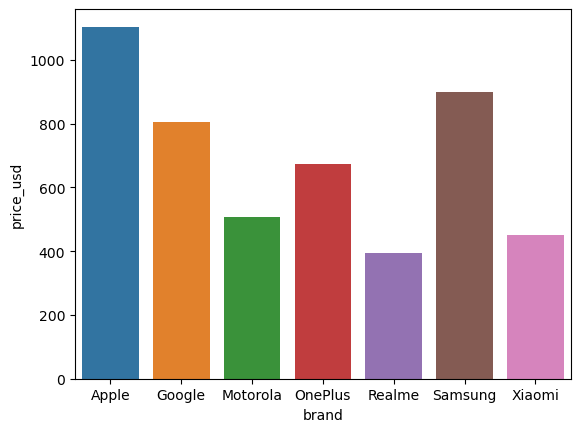

In [31]:
plot=sns.barplot(mobile_reviews.groupby('brand').mean(numeric_only=True)[['price_usd']].reset_index(),
            x='brand' , y='price_usd')
plt.show()

#### Mobile phone brands with more positive sentiments

In [33]:
mobile_reviews[mobile_reviews['sentiment']=='Positive'].groupby(['brand','sentiment']).count()[['review_id']].sort_values(by='review_id',ascending=False)

,,review_id
brand,sentiment,
Google,Positive,3999
Realme,Positive,3973
Xiaomi,Positive,3960
OnePlus,Positive,3959
Apple,Positive,3949
Samsung,Positive,3872
Motorola,Positive,3828


In [55]:
grouped = mobile_reviews.groupby(['brand','sentiment']).count()[['review_id']].sort_values(by='review_id',ascending=False)

In [57]:
pivot = grouped.reset_index().pivot(
    index='brand',
    columns='sentiment',
    values='review_id'
)
pivot

sentiment,Negative,Neutral,Positive
brand,,,
Apple,1431,1764,3949
Google,1383,1852,3999
Motorola,1377,1856,3828
OnePlus,1434,1743,3959
Realme,1414,1745,3973
Samsung,1402,1778,3872
Xiaomi,1470,1811,3960


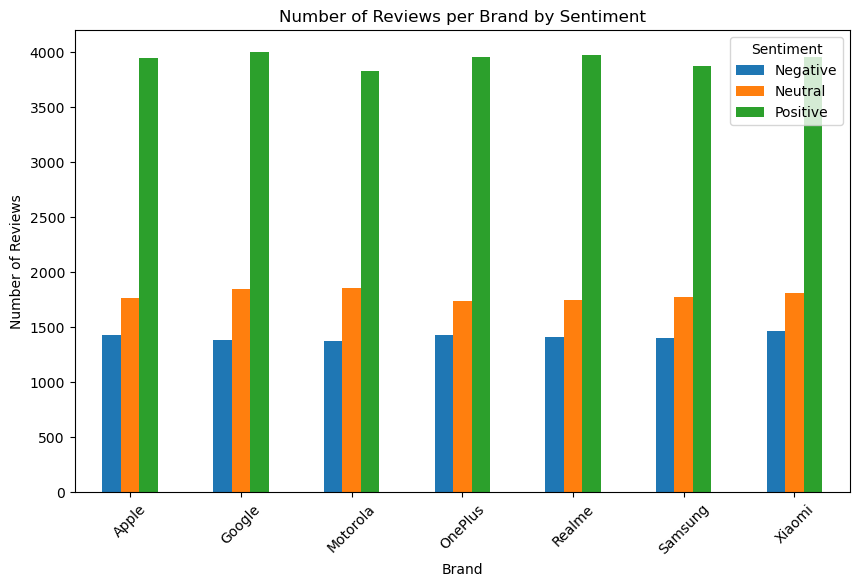

In [59]:
pivot.plot(kind='bar',
           figsize=(10,6))

plt.title("Number of Reviews per Brand by Sentiment")
plt.xlabel("Brand")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()

### 📊 Key Insights
- **Apple leads in pricing, Realme in affordability**: Among major smartphone brands, Apple devices average the highest price at over \\$1.100, while Realme offers the most budget-friendly option at around \\$393. Google and Samsung sit in the mid-to-high range, whereas Xiaomi and Motorola provide more affordable alternatives. This highlights a clear segmentation in the market, with Chinese brands (Realme, Xiaomi) positioning themselves as cost-effective choices compared to premium players like Apple and Samsung.
- **Realme’s high average rating**: Realme leads with the strongest overall ratings among users.  
- **Google’s positive sentiment dominance**: Despite not having the highest ratings, Google generates the most positive user sentiment.  
- **Xiaomi’s paradox**: Xiaomi records the lowest average rating but shows more positive sentiment than Apple.  
- **User expectations effect**: Xiaomi , Realme users, paying much less for their devices, may have lower expectations, which translates into greater satisfaction compared to Apple users.  

### 3. Phone Specs Analysis

#### Average battery life ratings

In [38]:
mobile_reviews.groupby('brand').mean(numeric_only=True)[['battery_life_rating']].sort_values(by='battery_life_rating',ascending = False)

,battery_life_rating
brand,
Realme,2.730651
Apple,2.724524
OnePlus,2.721413
Google,2.719934
Samsung,2.716534
Xiaomi,2.711642
Motorola,2.701175


#### Average camera rating

In [40]:
mobile_reviews.groupby('brand').mean(numeric_only=True)[['camera_rating']].sort_values(by='camera_rating',ascending = False)

,camera_rating
brand,
Apple,2.736842
OnePlus,2.729120
Realme,2.721817
Google,2.719381
Xiaomi,2.716890
Samsung,2.701929
Motorola,2.697068


#### Average display rating

In [42]:
mobile_reviews.groupby('brand').mean(numeric_only=True)[['display_rating']].sort_values(by='display_rating',ascending = False)

,display_rating
brand,
Realme,2.745934
Google,2.734172
Apple,2.723964
OnePlus,2.722393
Motorola,2.717037
Xiaomi,2.708189
Samsung,2.696965


#### Average performance rating

In [44]:
mobile_reviews.groupby('brand').mean(numeric_only=True)[['performance_rating']].sort_values(by='performance_rating',ascending = False)

,performance_rating
brand,
Realme,2.754066
OnePlus,2.723515
Apple,2.720465
Motorola,2.717179
Xiaomi,2.715233
Samsung,2.704481
Google,2.702516


#### Average design rating

In [46]:
mobile_reviews.groupby('brand').mean(numeric_only=True)[['design_rating']].sort_values(by='design_rating',ascending = False)

,design_rating
brand,
Apple,2.726064
Realme,2.724201
Google,2.723666
Xiaomi,2.710952
Motorola,2.710098
Samsung,2.702921
OnePlus,2.699552


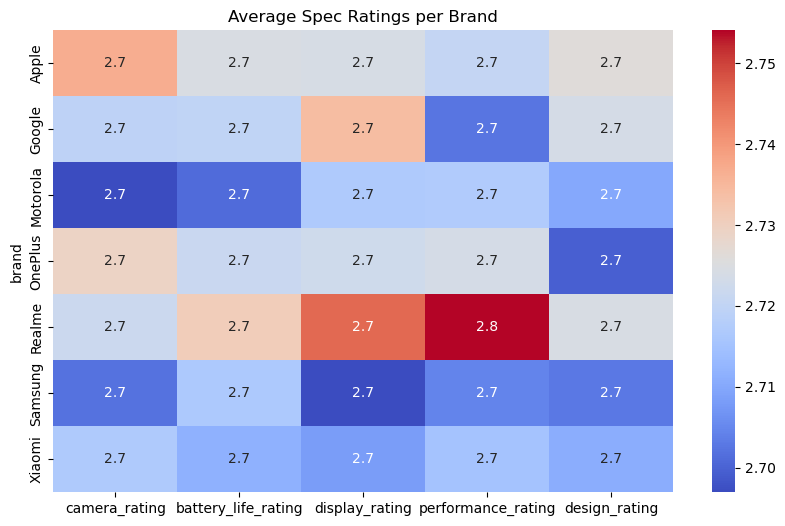

In [47]:
spec_cols = ["camera_rating", "battery_life_rating", "display_rating", "performance_rating","design_rating"]

brand_specs = mobile_reviews.groupby("brand")[spec_cols].mean()

plt.figure(figsize=(10,6))
sns.heatmap(brand_specs, annot=True, cmap="coolwarm")
plt.title("Average Spec Ratings per Brand")
plt.show()

### 📊 Key Insights

- **Apple excels in design**: Apple leads slightly in design rating (2.73), showing strong user appreciation for aesthetics.
- **Samsung lags across categories**: Samsung consistently ranks near the bottom in design, display, and battery life, suggesting weaker user sentiment compared to rivals.
- **Realme dominates performance and display**: Realme leads in both performance (2.75) and display (2.75), establishing itself as the most well‑rounded brand in technical features and overall user satisfaction.
                                                                                                            

### 4. Country-Level Analysis

#### Creating a dictionary with the phone brand as keys and their country of origin as values

In [51]:
brand_country={'Apple':'USA' , 'Google':'USA' , 'Xiaomi':'China','Samsung' : 'South Korea','OnePlus':'China','Motorola':'China','Realme':'China'}

In [52]:
brand_country

{'Apple': 'USA',
 'Google': 'USA',
 'Xiaomi': 'China',
 'Samsung': 'South Korea',
 'OnePlus': 'China',
 'Motorola': 'China',
 'Realme': 'China'}

#### Creating new column extract the country of origin of the brand of each mobile phone

In [54]:
mobile_reviews['mobile_country']=mobile_reviews['brand'].map(brand_country)

In [55]:
mobile_reviews

,review_id,age,brand,model,price_usd,rating,sentiment,country,review_date,verified_purchase,battery_life_rating,camera_rating,performance_rating,design_rating,display_rating,source,mobile_country
0,1,45,Realme,Realme 12 Pro,337.31,2,Negative,India,2023-11-06,True,1,1,3,2,1,Amazon,China
1,2,18,Realme,Realme 12 Pro,307.78,4,Positive,Brazil,2023-03-30,True,3,2,4,3,2,Flipkart,China
2,3,27,Google,Pixel 6,864.53,4,Positive,India,2022-12-07,True,3,5,3,2,4,AliExpress,USA
3,4,19,Xiaomi,Redmi Note 13,660.94,3,Positive,UAE,2025-03-11,False,1,3,2,1,2,Amazon,China
4,5,38,Motorola,Edge 50,792.13,3,Neutral,Brazil,2023-09-29,True,3,3,2,2,1,BestBuy,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,18,Realme,Realme 12 Pro,526.10,4,Positive,Australia,2023-08-17,False,3,3,4,3,5,BestBuy,China
49996,49997,28,Samsung,Galaxy Note 20,911.85,3,Neutral,Australia,2023-09-23,False,3,2,4,1,3,AliExpress,South Korea
49997,49998,21,Apple,iPhone SE,1155.32,5,Positive,UAE,2023-04-04,True,2,3,4,4,5,Amazon,USA
49998,49999,31,Realme,Realme Narzo 70,459.04,3,Positive,USA,2025-07-11,True,1,2,2,1,3,AliExpress,China


#### Average rating per country of origin

In [57]:
mobile_reviews.groupby('mobile_country').mean(numeric_only = True)[['rating']]

,rating
mobile_country,
China,3.123906
South Korea,3.113868
USA,3.126095


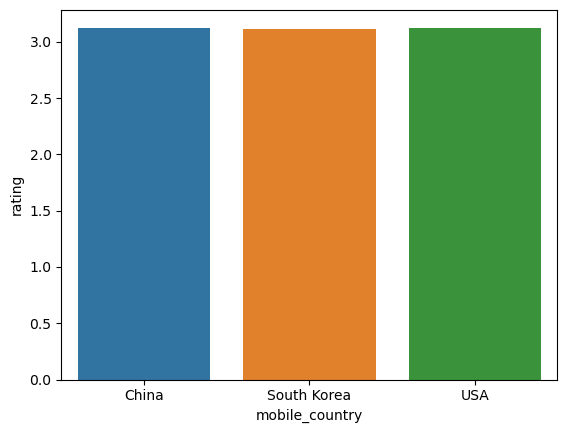

In [58]:
sns.barplot(data=mobile_reviews.groupby('mobile_country').mean(numeric_only = True)[['rating']].reset_index(),
            x='mobile_country' , y='rating')
plt.show()

#### Count of reviews per country of origin

In [60]:
mobile_reviews.groupby('mobile_country').count()[['rating']]

,rating
mobile_country,
China,28570
South Korea,7052
USA,14378


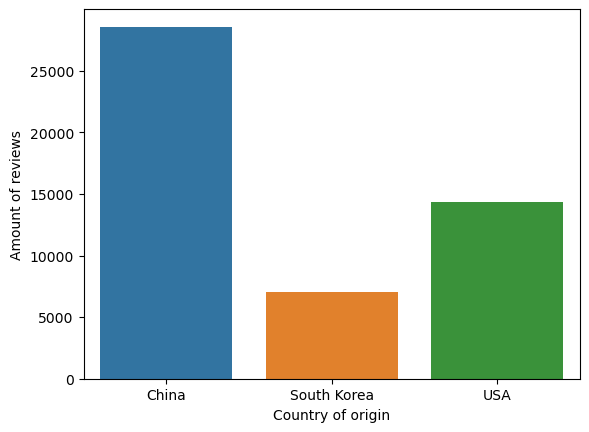

In [61]:
plot=sns.barplot(data=mobile_reviews.groupby('mobile_country').count()[['rating']].reset_index(),
            x='mobile_country' , y='rating')
plot.set(xlabel="Country of origin" ,ylabel="Amount of reviews")
plt.show()

In [62]:
mobile_reviews.groupby('mobile_country').mean(numeric_only=True)[['price_usd']]

,price_usd
mobile_country,
China,505.277531
South Korea,899.569377
USA,953.202347


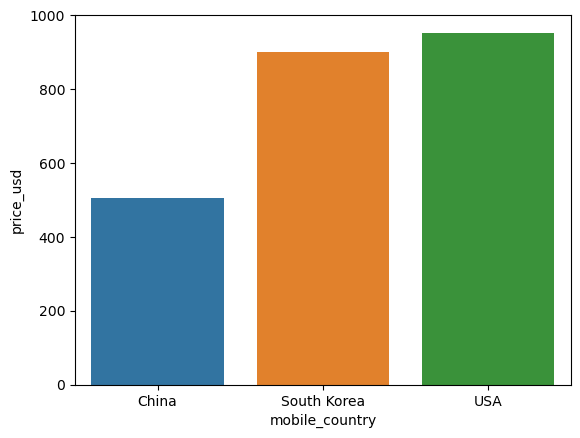

In [63]:
sns.barplot(data=mobile_reviews.groupby('mobile_country').mean(numeric_only=True)[['price_usd']].reset_index(),
            x='mobile_country' , y='price_usd')
plt.show()

### 📊 Key Insight
- **Chinese smartphones lead in reviews and ratings**: With their massive global sales volume, Chinese brands generate the highest number of customer reviews. By offering affordable alternatives, they attract a broad customer base and consistently outperform other countries in overall ratings.  

### 5. Brand-Country Interaction
Question : **Do brands from certain countries perform better across regions?**

In [66]:
cross_country_reviews=pd.crosstab(mobile_reviews['country'],mobile_reviews['mobile_country'])
cross_country_reviews

mobile_country,China,South Korea,USA
country,,,
Australia,3560,852,1807
Brazil,3669,916,1834
Canada,3483,868,1819
Germany,3523,888,1751
India,3440,891,1793
UAE,3600,864,1797
UK,3584,877,1749
USA,3711,896,1828


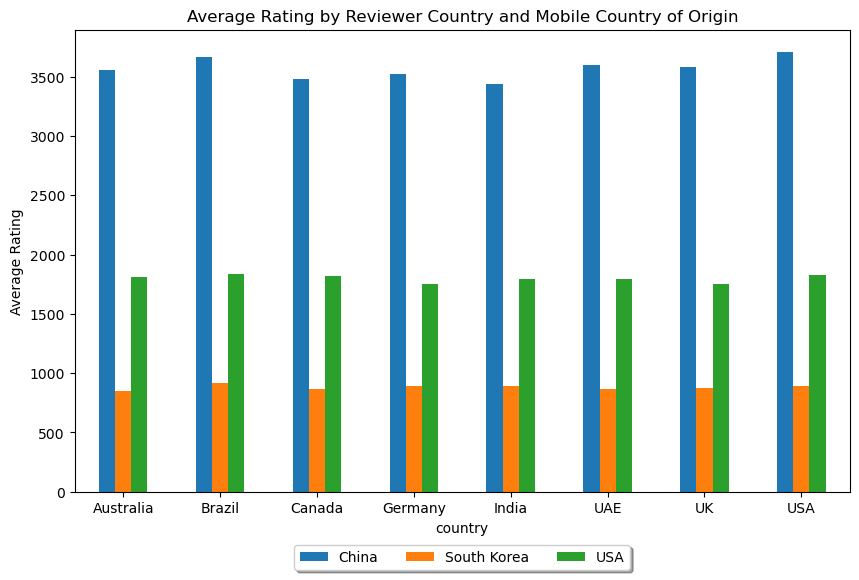

In [67]:
cross_country_reviews_plot= cross_country_reviews.plot(kind='bar', figsize=(10,6),rot=45)
plt.ylabel("Average Rating")
plt.title("Average Rating by Reviewer Country and Mobile Country of Origin")
plt.xticks(rotation=45)
plt.legend(title="Mobile Country of Origin")
cross_country_reviews_plot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
cross_country_reviews_plot.tick_params(axis='x', labelrotation=0)

plt.show() 

In [68]:
mobile_reviews.groupby(['country','mobile_country']).mean(numeric_only = True)[['rating']]

rating
country   mobile_country          
Australia China           3.120225
          South Korea     3.167840
          USA             3.147759
Brazil    China           3.120741
          South Korea     3.129913
          USA             3.096510
Canada    China           3.123170
          South Korea     3.119816
          USA             3.118197
Germany   China           3.122623
          South Korea     3.115991
          USA             3.073672
India     China           3.106686
          South Korea     3.098765
          USA             3.142777
UAE       China           3.137778
          South Korea     3.125000
          USA             3.168614
UK        China           3.138951
          South Korea     3.055872
          USA             3.131504
USA       China           3.120453
          South Korea     3.099330
          USA             3.129103

In [69]:
pivot = mobile_reviews.pivot_table(
    values='rating',
    index='country',                 # reviewer country
    columns='mobile_country',  # phone origin country
    aggfunc='mean'
)
pivot

mobile_country,China,South Korea,USA
country,,,
Australia,3.120225,3.167840,3.147759
Brazil,3.120741,3.129913,3.096510
Canada,3.123170,3.119816,3.118197
Germany,3.122623,3.115991,3.073672
India,3.106686,3.098765,3.142777
UAE,3.137778,3.125000,3.168614
UK,3.138951,3.055872,3.131504
USA,3.120453,3.099330,3.129103


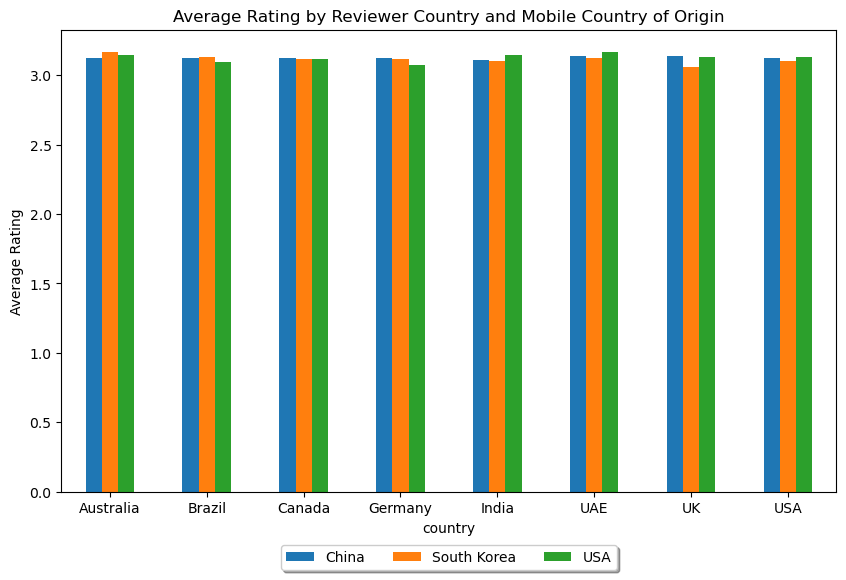

In [70]:
pivot_plot= pivot.plot(kind='bar', figsize=(10,6),rot=45)
plt.ylabel("Average Rating")
plt.title("Average Rating by Reviewer Country and Mobile Country of Origin")
plt.xticks(rotation=45)
plt.legend(title="Mobile Country of Origin")
pivot_plot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
pivot_plot.tick_params(axis='x', labelrotation=0) 

plt.show() 

## ✅ 📌 Final Conclusions 

---

### **1. Brand Ratings & User Satisfaction**

- All seven brands — **Apple, Samsung, Motorola, Realme, Xiaomi, Google, OnePlus** — receive **similar overall ratings**, showing high overall user satisfaction.
- **Apple** leads in **camera quality**, consistent with its premium positioning.
- **Realme**, despite being a **budget brand**, performs exceptionally well across all specs and consistently ranks among the top.
- **Motorola** and **OnePlus** deliver **stable mid-to-high ratings** across key categories.

---

### **2. Spec-Based Insights**

Even with similar overall ratings, brands differ across specific categories:

#### **Camera Satisfaction**
**Apple clearly tops the list**, reflecting its reputation for **premium camera systems**.

#### **Performance / Speed Satisfaction**
**Realme** ranks extremely high, rivaling premium and mid-premium brands.

#### **Display Satisfaction**
Contrary to expectations:
- **Realme** tops the list in **display satisfaction**,  
- while **Samsung** — despite its global reputation for AMOLED displays — ranks **last** in this dataset.

This suggests that user expectations may differ significantly from real-world hardware performance.

---

#### **📌 Realme’s Strong Multi-Category Performance**

A standout observation is that **Realme ranks in the top 3 across *all* spec categories**:

- **Camera:** Top 3  
- **Battery:** Top 3  
- **Display:** Top 3  
- **Performance:** Top 3  

This is exceptional for a **budget brand**, confirming that Realme offers one of the strongest all-around value propositions in the dataset.

➡️ Realme is one of the **most well-rounded brands** overall.

---

### **3. Pricing Insights (Based on Actual Average Prices)**

- **Apple** and **Samsung** occupy the **highest price tier** (premium segment).
- **Google** and **OnePlus** sit in the **mid-premium segment**.
- **Realme** and **Xiaomi** are **by far the cheapest brands**, forming the **budget segment**.
- **Motorola** spans budget to lower mid-range.

**Key takeaway:**  
➡️ **Higher prices do NOT guarantee higher satisfaction.**  
Budget brands frequently score just as high — or higher — than premium models.

---

### **4. Country–of–Origin Interactions**

Brand origin groups:

- **USA:** Apple, Google  
- **China:** Xiaomi, OnePlus, Realme, Motorola (Lenovo)  
- **South Korea:** Samsung  

Insights:

- Reviewers across countries rate all origins **consistently and fairly**.
- **No meaningful national bias** is observed:
  - American users do **not** downrate Chinese brands.
  - Indian users rate USA, Korean, and Chinese phones similarly.
- Ratings correlate with **perceived value and expectations**, not national origin.

---

### **5. Sentiment Distribution**

- Most reviews across all brands are **positive**.
- Negative sentiment appears when:
  - Premium users (**Apple, Samsung, Google**) encounter issues that fall short of their high expectations.
  - Budget users (**Xiaomi, Realme, Motorola**) hit the limits of low-cost hardware.

Still, sentiment remains **broadly positive and balanced**.

---

### **🔍 Final Insight: User Ratings Are Always Relative to Price**

A consistent pattern in the dataset:

**Users rate devices relative to their price bracket — not on absolute performance.**

- Premium buyers expect **near perfection**.  
  Even minor issues lower ratings.

- Budget buyers expect **value for money**.  
  If the device performs well for the price, they rate it highly.

➡️ **This is why Realme and Xiaomi (the cheapest brands) receive ratings comparable to Apple and Samsung (the most expensive).**

➡️ A budget phone can score just as well — or even better — than a premium device simply because it **exceeds expectations at its price point.**

---

### ⭐ **Overall Summary**

The smartphone market in this dataset is **balanced and highly competitive**:

- All brands achieve **similar overall satisfaction**, despite dramatic price differences.
- **Realme** and **Xiaomi**, the cheapest brands, deliver **exceptional value** and often outperform expectations.
- **Apple** dominates in camera quality, but high expectations from premium buyers lead to mixed sentiment.
- **Samsung performs well overall but ranks last in display satisfaction in this dataset**, showing that perception does not always match brand reputation.
- **No country-of-origin bias** is detected.
- **Price-driven expectations** play a major role in how users rate their devices.

📌 **In short: user satisfaction is driven by perceived value — not just raw specifications or brand name.**
